In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_weather_energy = pd.read_csv('./data/london_weather_energy.csv',  parse_dates=['date'])
df_weather_energy.head()

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,precipitation,snow_depth
0,2012-01-01,0.445,60.159,12.536493,7.0,11.9,12.2,11.3,7.2,0.0
1,2012-01-02,0.463,65.824,12.864265,1.0,12.6,8.1,4.2,2.0,0.0
2,2012-01-03,0.464,64.652,12.893674,5.0,11.7,8.7,4.7,7.8,0.0
3,2012-01-04,0.838,68.020,12.829674,4.0,11.0,8.1,4.4,2.0,0.0
4,2012-01-05,0.764,63.598,12.980193,4.0,10.6,8.3,5.5,0.2,0.0


In [31]:
df_weather_energy.index = df_weather_energy.date

In [32]:
df_weather_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2012-01-01 to 2013-12-31
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           731 non-null    datetime64[ns]
 1   min            731 non-null    float64       
 2   max            731 non-null    float64       
 3   mean           731 non-null    float64       
 4   cloud_cover    730 non-null    float64       
 5   max_temp       731 non-null    float64       
 6   mean_temp      731 non-null    float64       
 7   min_temp       731 non-null    float64       
 8   precipitation  731 non-null    float64       
 9   snow_depth     731 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 62.8 KB


In [33]:
df_weather_energy.describe()

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,precipitation,snow_depth
count,731,731.000000,731.000000,731.000000,730.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-12-31 00:00:00,0.754442,58.747817,10.675034,4.710959,15.078249,11.247059,7.368263,1.733926,0.045144
min,2012-01-01 00:00:00,0.004000,29.813000,7.967513,0.000000,-0.200000,-2.600000,-7.600000,0.000000,0.000000
25%,2012-07-01 12:00:00,0.557500,47.048000,9.014205,3.000000,10.300000,7.000000,3.250000,0.000000,0.000000
50%,2012-12-31 00:00:00,0.784000,56.007000,10.272576,5.000000,14.800000,10.800000,7.400000,0.200000,0.000000
75%,2013-07-01 12:00:00,0.919000,67.046500,12.290259,7.000000,19.750000,15.800000,11.900000,2.000000,0.000000
max,2013-12-31 00:00:00,1.655000,132.983000,15.603280,8.000000,34.100000,25.400000,20.700000,29.800000,7.000000
std,NaN,0.293077,15.640488,1.809204,2.402563,6.786760,5.894825,5.407314,3.606394,0.424442


In [34]:
df_weather_energy['snow'] = df_weather_energy['snow_depth'].map(lambda x: False if x == 0 else True)
df_weather_energy

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,precipitation,snow_depth,snow
date,,,,,,,,,,,
2012-01-01,2012-01-01,0.445,60.159,12.536493,7.0,11.9,12.2,11.3,7.2,0.0,False
2012-01-02,2012-01-02,0.463,65.824,12.864265,1.0,12.6,8.1,4.2,2.0,0.0,False
2012-01-03,2012-01-03,0.464,64.652,12.893674,5.0,11.7,8.7,4.7,7.8,0.0,False
2012-01-04,2012-01-04,0.838,68.020,12.829674,4.0,11.0,8.1,4.4,2.0,0.0,False
2012-01-05,2012-01-05,0.764,63.598,12.980193,4.0,10.6,8.3,5.5,0.2,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,2013-12-27,0.536,64.658,12.067254,4.0,8.8,6.3,1.8,0.0,0.0,False
2013-12-28,2013-12-28,0.550,72.353,11.930291,2.0,10.5,6.3,3.7,0.0,0.0,False
2013-12-29,2013-12-29,0.538,62.881,12.591813,1.0,10.5,5.1,-0.3,0.4,0.0,False


In [35]:
df_weather_energy['rain'] = df_weather_energy['precipitation'].map(lambda x: False if x == 0 else True)
df_weather_energy

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,precipitation,snow_depth,snow,rain
date,,,,,,,,,,,,
2012-01-01,2012-01-01,0.445,60.159,12.536493,7.0,11.9,12.2,11.3,7.2,0.0,False,True
2012-01-02,2012-01-02,0.463,65.824,12.864265,1.0,12.6,8.1,4.2,2.0,0.0,False,True
2012-01-03,2012-01-03,0.464,64.652,12.893674,5.0,11.7,8.7,4.7,7.8,0.0,False,True
2012-01-04,2012-01-04,0.838,68.020,12.829674,4.0,11.0,8.1,4.4,2.0,0.0,False,True
2012-01-05,2012-01-05,0.764,63.598,12.980193,4.0,10.6,8.3,5.5,0.2,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,2013-12-27,0.536,64.658,12.067254,4.0,8.8,6.3,1.8,0.0,0.0,False,False
2013-12-28,2013-12-28,0.550,72.353,11.930291,2.0,10.5,6.3,3.7,0.0,0.0,False,False
2013-12-29,2013-12-29,0.538,62.881,12.591813,1.0,10.5,5.1,-0.3,0.4,0.0,False,True


In [36]:
df_weather_energy_new = df_weather_energy.drop(columns=[ 'precipitation', 'snow_depth'])
df_weather_energy_new.shape

(731, 10)

In [37]:
df_weather_energy_new

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,snow,rain
date,,,,,,,,,,
2012-01-01,2012-01-01,0.445,60.159,12.536493,7.0,11.9,12.2,11.3,False,True
2012-01-02,2012-01-02,0.463,65.824,12.864265,1.0,12.6,8.1,4.2,False,True
2012-01-03,2012-01-03,0.464,64.652,12.893674,5.0,11.7,8.7,4.7,False,True
2012-01-04,2012-01-04,0.838,68.020,12.829674,4.0,11.0,8.1,4.4,False,True
2012-01-05,2012-01-05,0.764,63.598,12.980193,4.0,10.6,8.3,5.5,False,True
...,...,...,...,...,...,...,...,...,...,...
2013-12-27,2013-12-27,0.536,64.658,12.067254,4.0,8.8,6.3,1.8,False,False
2013-12-28,2013-12-28,0.550,72.353,11.930291,2.0,10.5,6.3,3.7,False,False
2013-12-29,2013-12-29,0.538,62.881,12.591813,1.0,10.5,5.1,-0.3,False,True


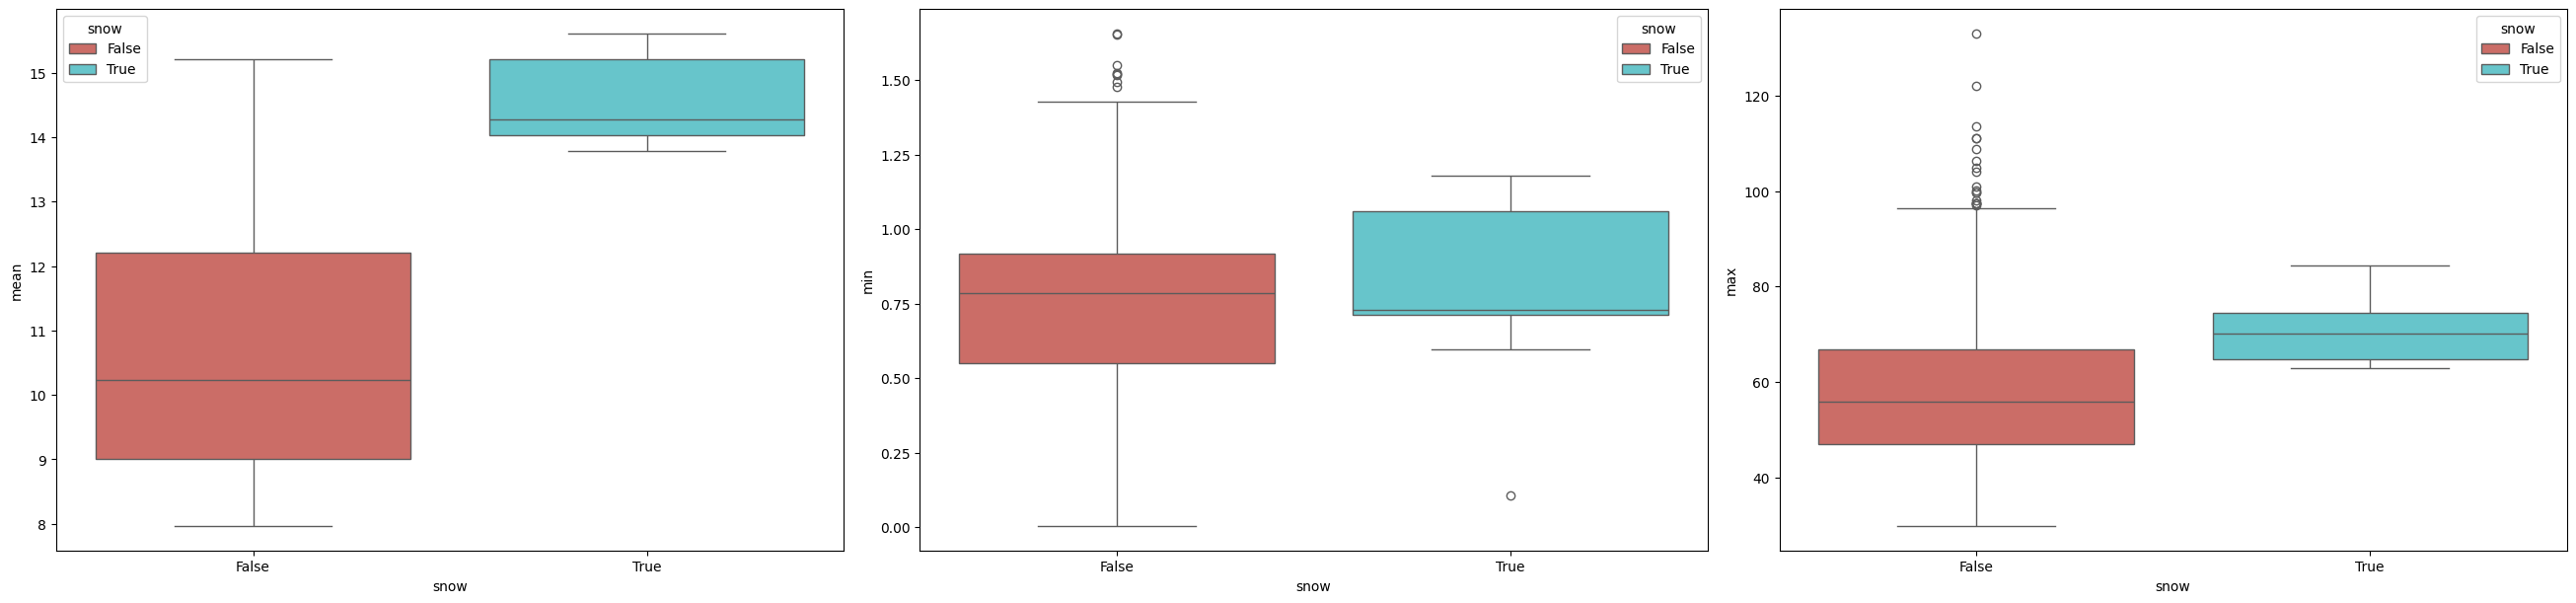

In [38]:
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1, ax2, ax3) = fig.subplots(1,3)

sns.boxplot(x='snow', y='mean', data = df_weather_energy_new, hue= 'snow', ax = ax1, palette=sns.color_palette('hls', 2))
sns.boxplot(x='snow', y='min', data = df_weather_energy_new, hue= 'snow', ax = ax2, palette=sns.color_palette('hls', 2))
sns.boxplot(x='snow', y='max', data = df_weather_energy_new, hue= 'snow', ax = ax3, palette=sns.color_palette('hls', 2))
plt.show()

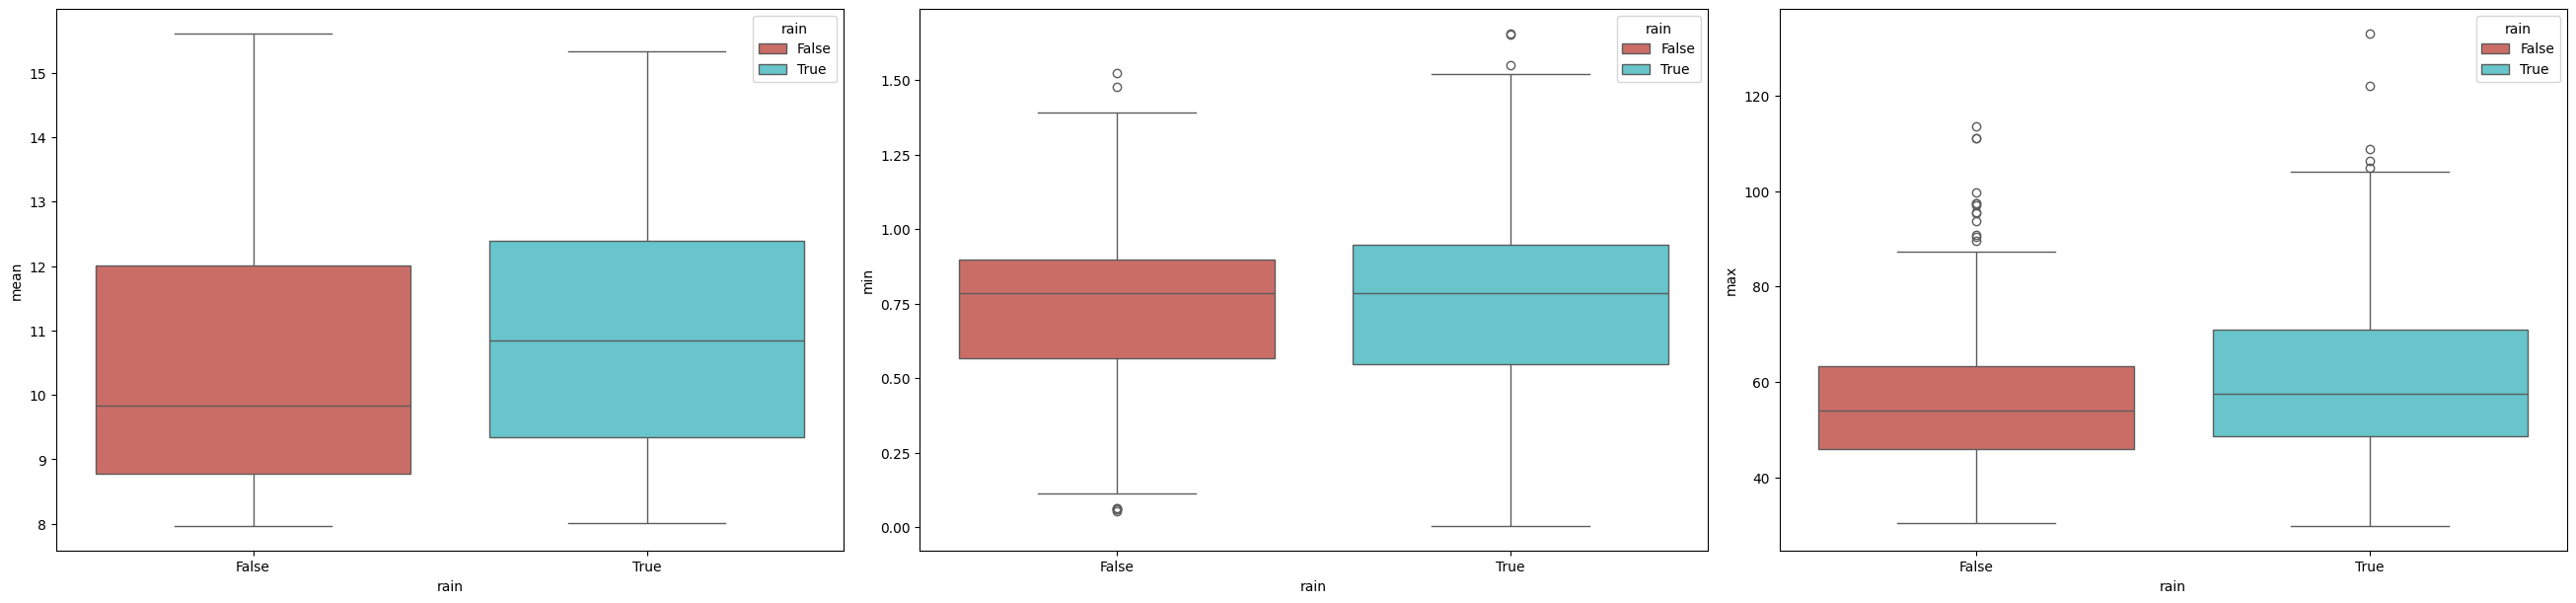

In [39]:
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1, ax2, ax3) = fig.subplots(1,3)

sns.boxplot(x='rain', y='mean', data = df_weather_energy_new, hue= 'rain', ax = ax1, palette=sns.color_palette('hls', 2))
sns.boxplot(x='rain', y='min', data = df_weather_energy_new, hue= 'rain', ax = ax2, palette=sns.color_palette('hls', 2))
sns.boxplot(x='rain', y='max', data = df_weather_energy_new, hue= 'rain', ax = ax3, palette=sns.color_palette('hls', 2))

plt.show()

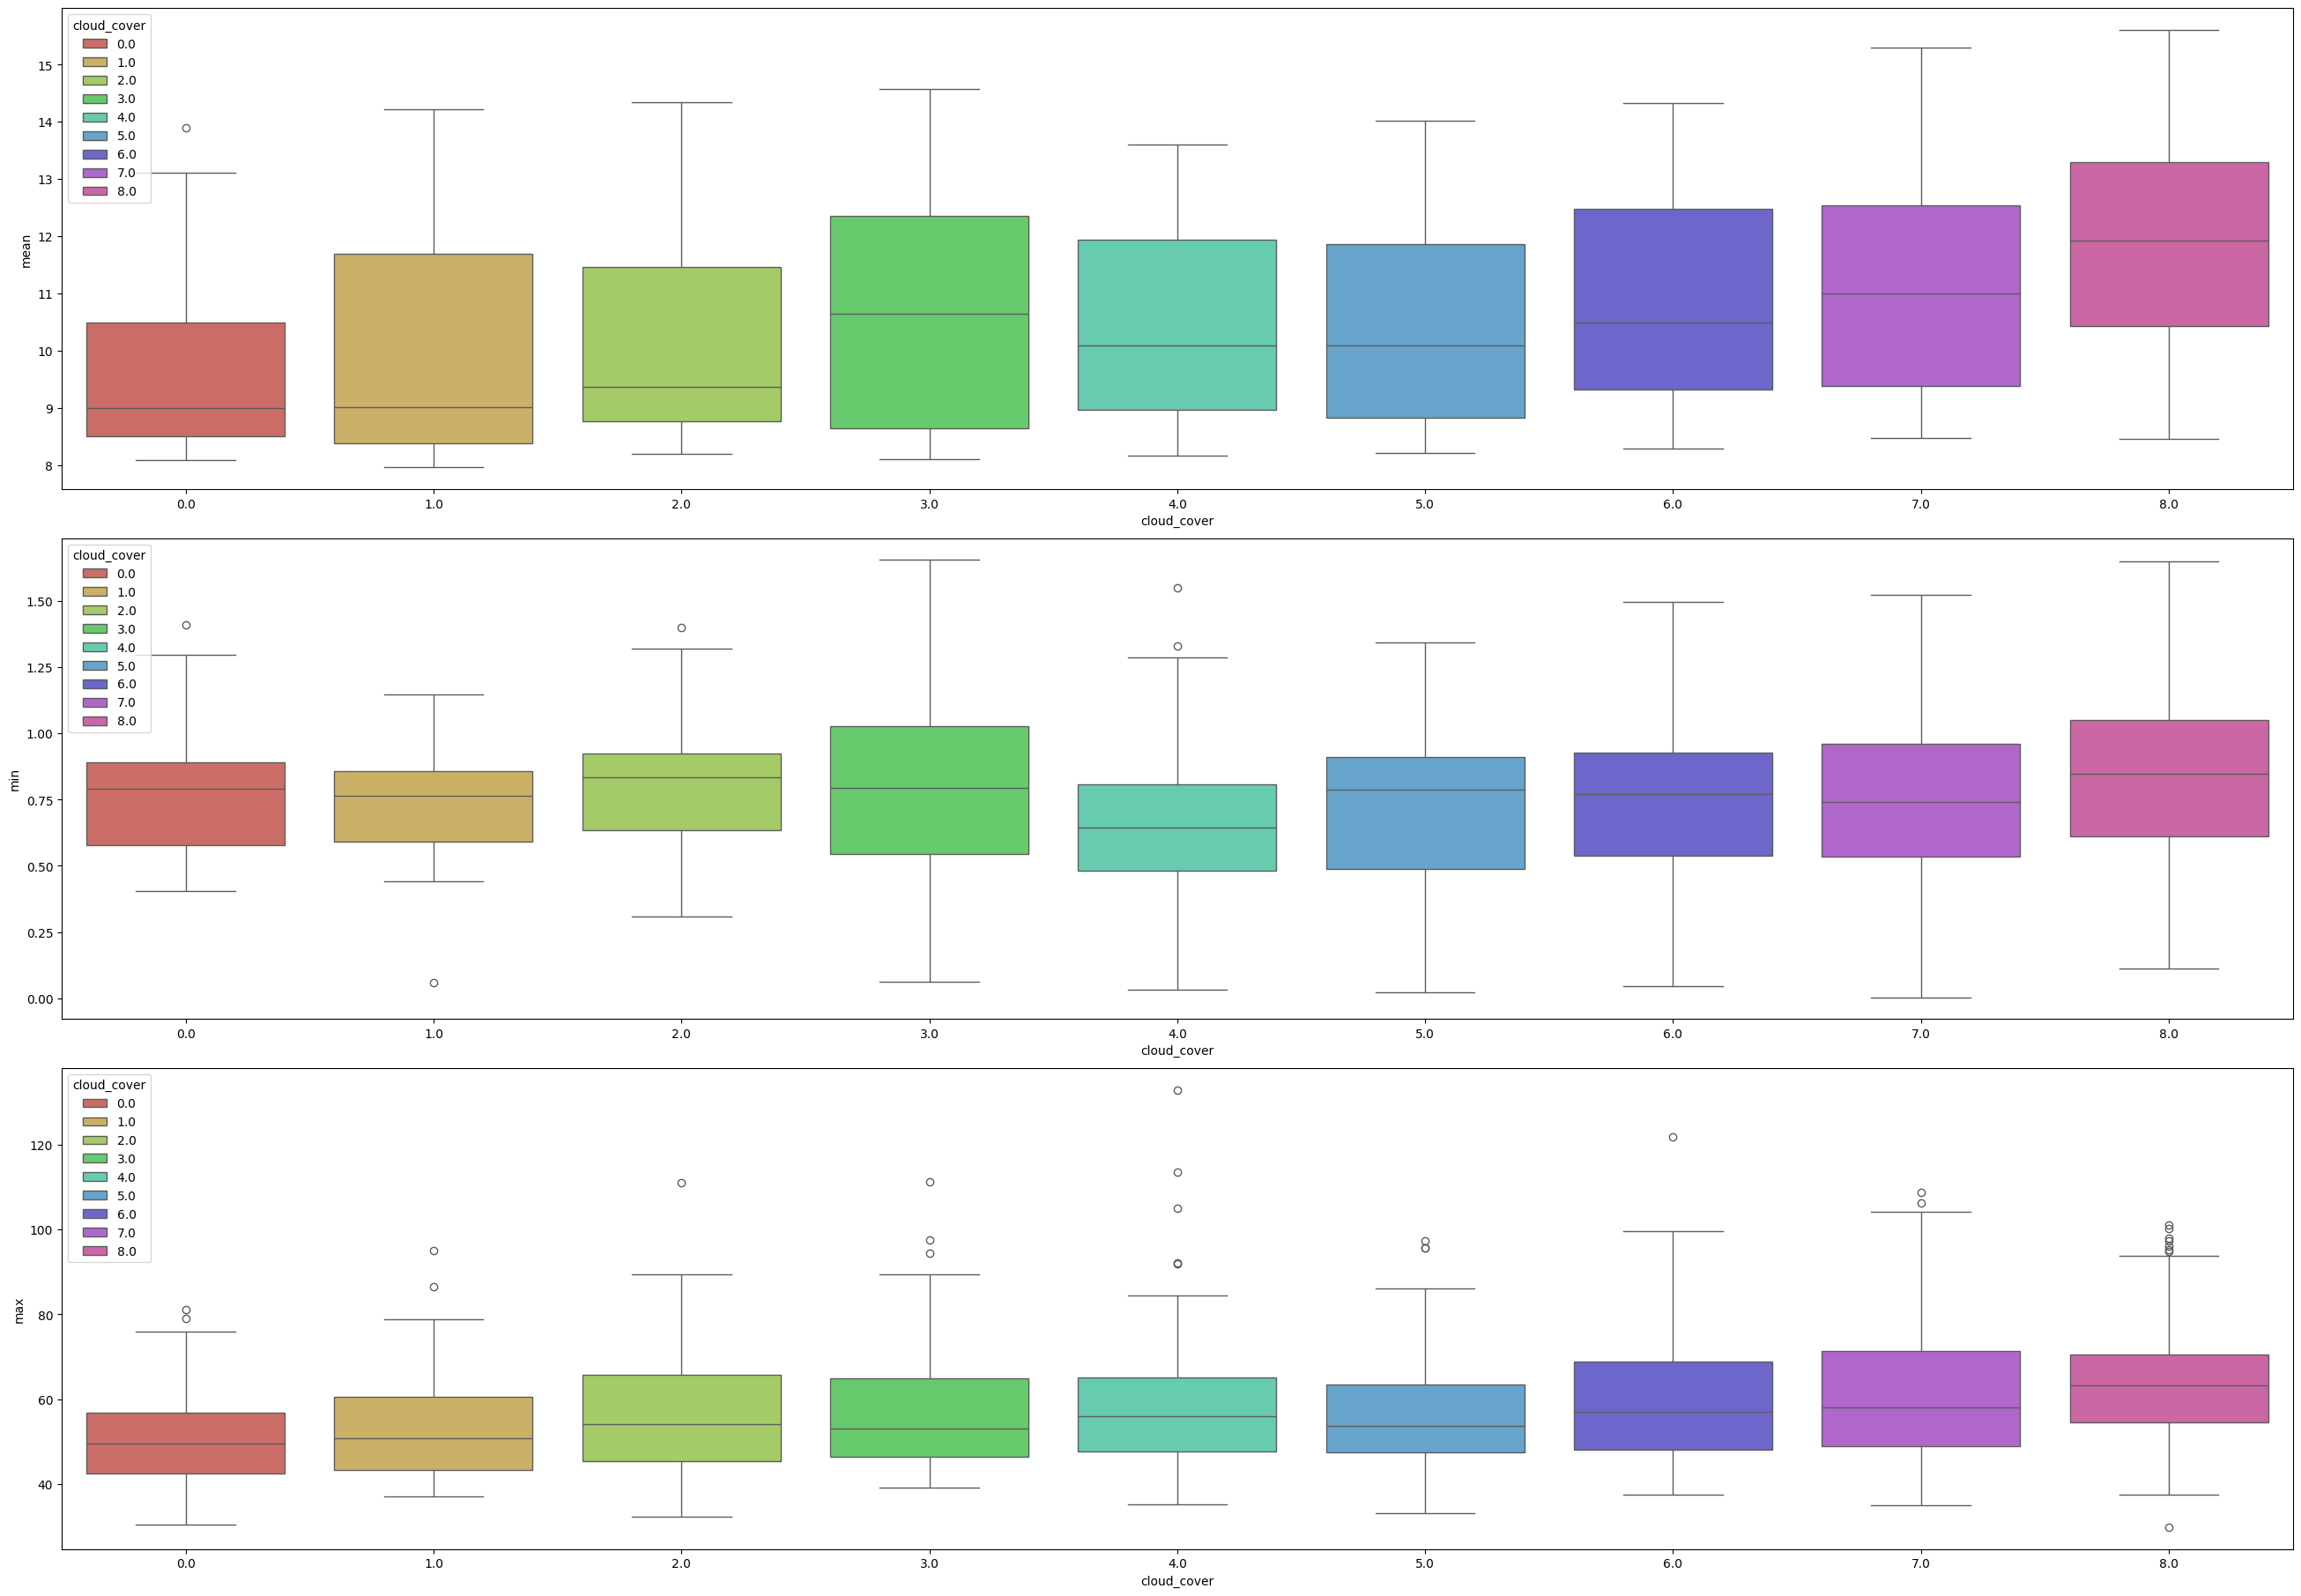

In [40]:
fig = plt.figure(figsize=(26,18), layout='constrained')
(ax1, ax2, ax3) = fig.subplots(3,1)

sns.boxplot(x='cloud_cover', y='mean', data = df_weather_energy_new, hue= 'cloud_cover', ax=ax1, palette=sns.color_palette('hls', 9))
sns.boxplot(x='cloud_cover', y='min', data = df_weather_energy_new, hue= 'cloud_cover', ax=ax2, palette=sns.color_palette('hls', 9))
sns.boxplot(x='cloud_cover', y='max', data = df_weather_energy_new, hue= 'cloud_cover', ax=ax3, palette=sns.color_palette('hls', 9))

plt.show()

In [41]:
def weather_maxtemp_modify(x):
    if x < 11:
        return '1'
    elif x >= 11 and x < 15:
        return '2'
    elif x >= 15 and x < 20:
        return '3' 
    else: 
        return '4'
                                                                                    
def weather_mintemp_modify(x):
    if x < 4:
        return '1'
    elif x >= 4 and x < 8:
        return '2'
    elif x >= 8 and x < 12:
        return '3'    
    else: 
        return '4'

def weather_meantemp_modify(x):
    if x < 7:
        return '1'
    elif x >= 7 and x < 11:
        return '2'
    elif x >= 11 and x < 16:
        return '3'    
    else: 
        return '4'



In [42]:
df_weather_energy_new['maxtemp'] = df_weather_energy_new.max_temp.map(weather_maxtemp_modify)
df_weather_energy_new

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,snow,rain,maxtemp
date,,,,,,,,,,,
2012-01-01,2012-01-01,0.445,60.159,12.536493,7.0,11.9,12.2,11.3,False,True,2
2012-01-02,2012-01-02,0.463,65.824,12.864265,1.0,12.6,8.1,4.2,False,True,2
2012-01-03,2012-01-03,0.464,64.652,12.893674,5.0,11.7,8.7,4.7,False,True,2
2012-01-04,2012-01-04,0.838,68.020,12.829674,4.0,11.0,8.1,4.4,False,True,2
2012-01-05,2012-01-05,0.764,63.598,12.980193,4.0,10.6,8.3,5.5,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,2013-12-27,0.536,64.658,12.067254,4.0,8.8,6.3,1.8,False,False,1
2013-12-28,2013-12-28,0.550,72.353,11.930291,2.0,10.5,6.3,3.7,False,False,1
2013-12-29,2013-12-29,0.538,62.881,12.591813,1.0,10.5,5.1,-0.3,False,True,1


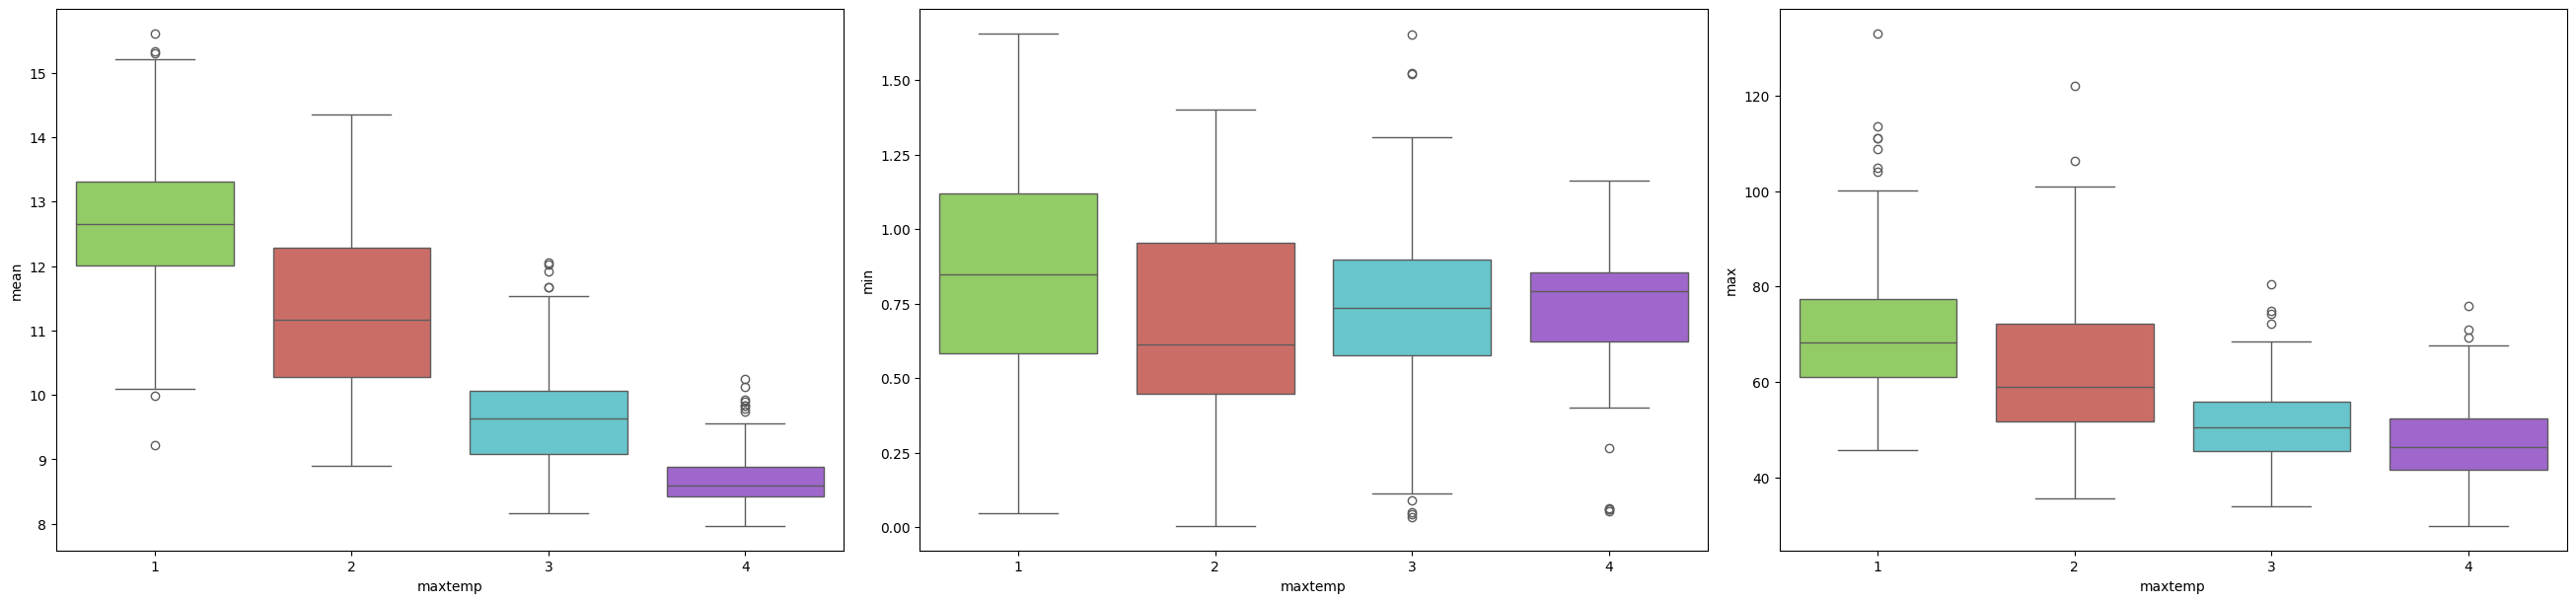

In [43]:
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1, ax2, ax3) = fig.subplots(1,3)

sns.boxplot(x='maxtemp', y='mean', data = df_weather_energy_new, order=[1,2,3,4], hue= 'maxtemp', ax=ax1, palette=sns.color_palette('hls', 4))
sns.boxplot(x='maxtemp', y='min', data = df_weather_energy_new,  order=[1,2,3,4],hue= 'maxtemp', ax=ax2, palette=sns.color_palette('hls', 4))
sns.boxplot(x='maxtemp', y='max', data = df_weather_energy_new,  order=[1,2,3,4],hue= 'maxtemp', ax=ax3, palette=sns.color_palette('hls', 4))
plt.show()

In [44]:
df_weather_energy_new['mintemp'] = df_weather_energy_new.min_temp.map(weather_mintemp_modify)
df_weather_energy_new

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,snow,rain,maxtemp,mintemp
date,,,,,,,,,,,,
2012-01-01,2012-01-01,0.445,60.159,12.536493,7.0,11.9,12.2,11.3,False,True,2,3
2012-01-02,2012-01-02,0.463,65.824,12.864265,1.0,12.6,8.1,4.2,False,True,2,2
2012-01-03,2012-01-03,0.464,64.652,12.893674,5.0,11.7,8.7,4.7,False,True,2,2
2012-01-04,2012-01-04,0.838,68.020,12.829674,4.0,11.0,8.1,4.4,False,True,2,2
2012-01-05,2012-01-05,0.764,63.598,12.980193,4.0,10.6,8.3,5.5,False,True,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,2013-12-27,0.536,64.658,12.067254,4.0,8.8,6.3,1.8,False,False,1,1
2013-12-28,2013-12-28,0.550,72.353,11.930291,2.0,10.5,6.3,3.7,False,False,1,1
2013-12-29,2013-12-29,0.538,62.881,12.591813,1.0,10.5,5.1,-0.3,False,True,1,1


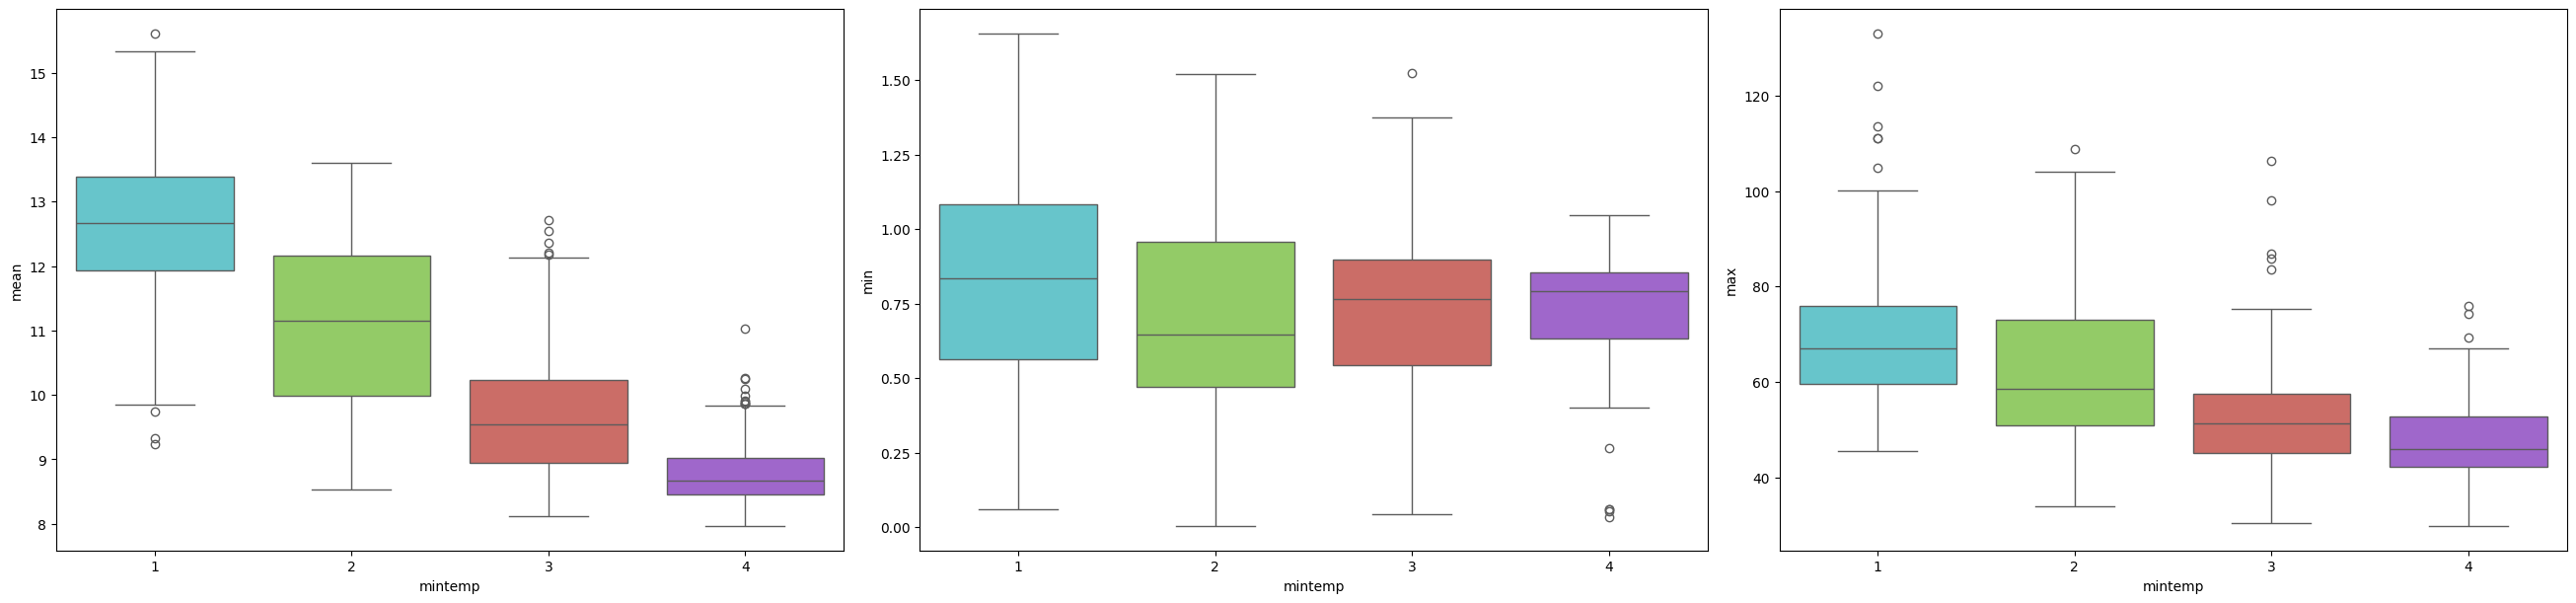

In [45]:
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1, ax2, ax3) = fig.subplots(1,3)

sns.boxplot(x='mintemp', y='mean', data = df_weather_energy_new, order=[1,2,3,4],hue= 'mintemp', ax=ax1, palette=sns.color_palette('hls', 4))
sns.boxplot(x='mintemp', y='min', data = df_weather_energy_new, order=[1,2,3,4],hue= 'mintemp', ax=ax2, palette=sns.color_palette('hls', 4))
sns.boxplot(x='mintemp', y='max', data = df_weather_energy_new, order=[1,2,3,4],hue= 'mintemp', ax=ax3, palette=sns.color_palette('hls', 4))


plt.show()

In [46]:
df_weather_energy_new['meantemp'] = df_weather_energy_new.mean_temp.map(weather_mintemp_modify)
df_weather_energy_new

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,snow,rain,maxtemp,mintemp,meantemp
date,,,,,,,,,,,,,
2012-01-01,2012-01-01,0.445,60.159,12.536493,7.0,11.9,12.2,11.3,False,True,2,3,4
2012-01-02,2012-01-02,0.463,65.824,12.864265,1.0,12.6,8.1,4.2,False,True,2,2,3
2012-01-03,2012-01-03,0.464,64.652,12.893674,5.0,11.7,8.7,4.7,False,True,2,2,3
2012-01-04,2012-01-04,0.838,68.020,12.829674,4.0,11.0,8.1,4.4,False,True,2,2,3
2012-01-05,2012-01-05,0.764,63.598,12.980193,4.0,10.6,8.3,5.5,False,True,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,2013-12-27,0.536,64.658,12.067254,4.0,8.8,6.3,1.8,False,False,1,1,2
2013-12-28,2013-12-28,0.550,72.353,11.930291,2.0,10.5,6.3,3.7,False,False,1,1,2
2013-12-29,2013-12-29,0.538,62.881,12.591813,1.0,10.5,5.1,-0.3,False,True,1,1,2


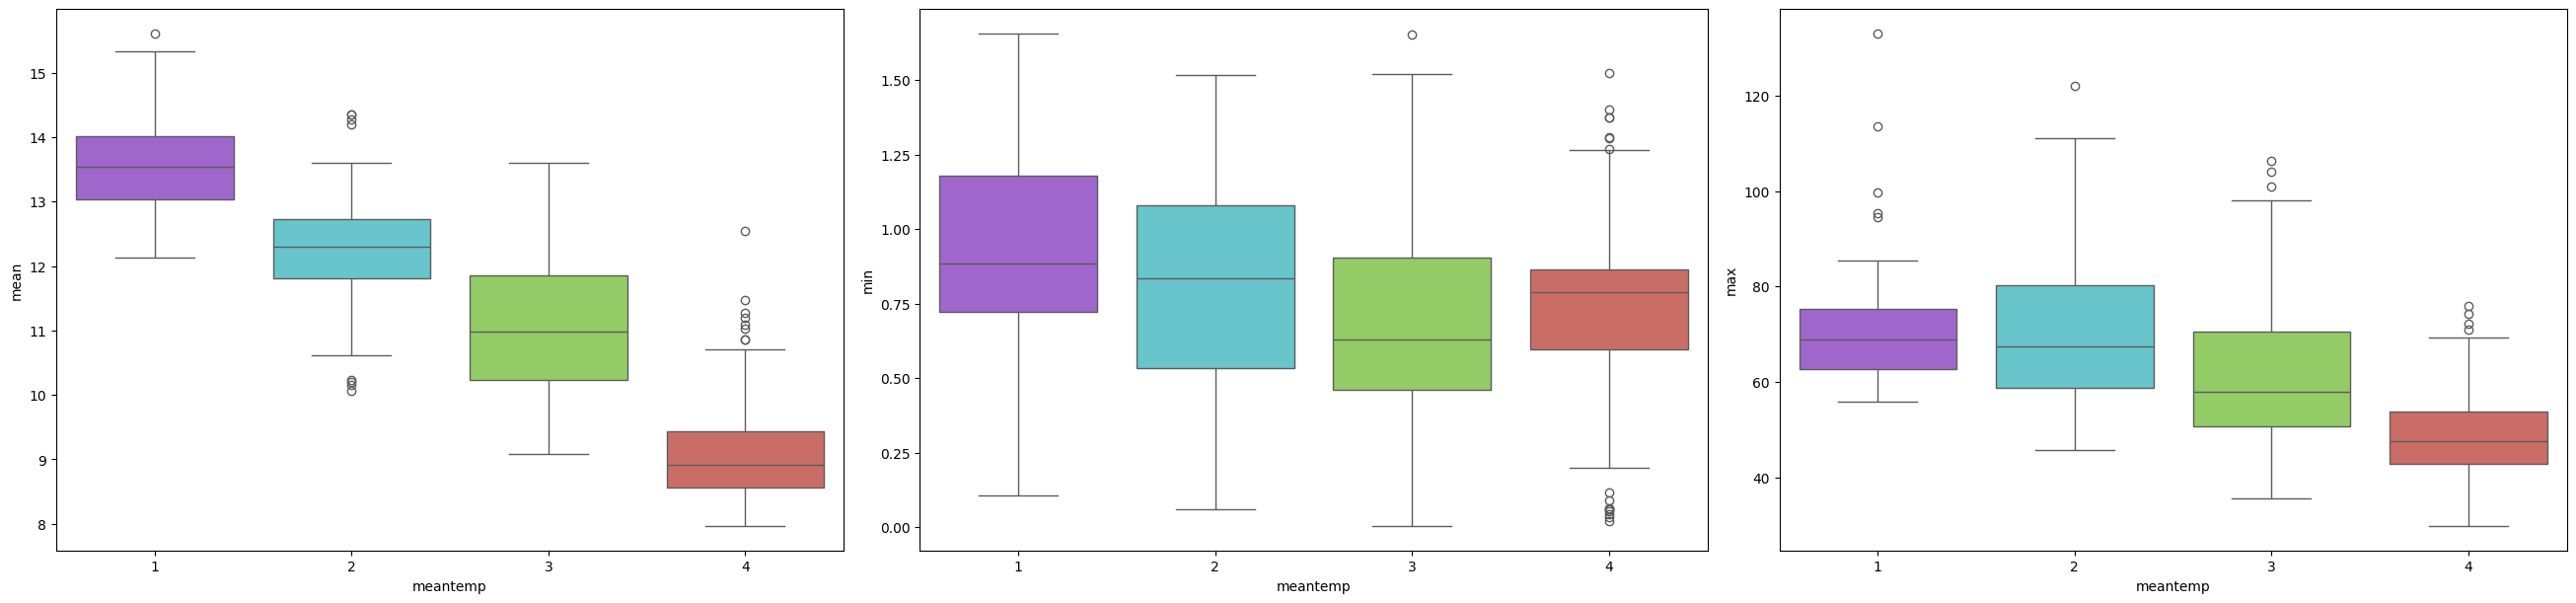

In [47]:
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1, ax2, ax3) = fig.subplots(1,3)

sns.boxplot(x='meantemp', y='mean', data = df_weather_energy_new, order=[1,2,3,4],hue= 'meantemp', ax=ax1, palette=sns.color_palette('hls', 4))
sns.boxplot(x='meantemp', y='min', data = df_weather_energy_new, order=[1,2,3,4],hue= 'meantemp', ax=ax2, palette=sns.color_palette('hls', 4))
sns.boxplot(x='meantemp', y='max', data = df_weather_energy_new, order=[1,2,3,4],hue= 'meantemp', ax=ax3, palette=sns.color_palette('hls', 4))

plt.show()

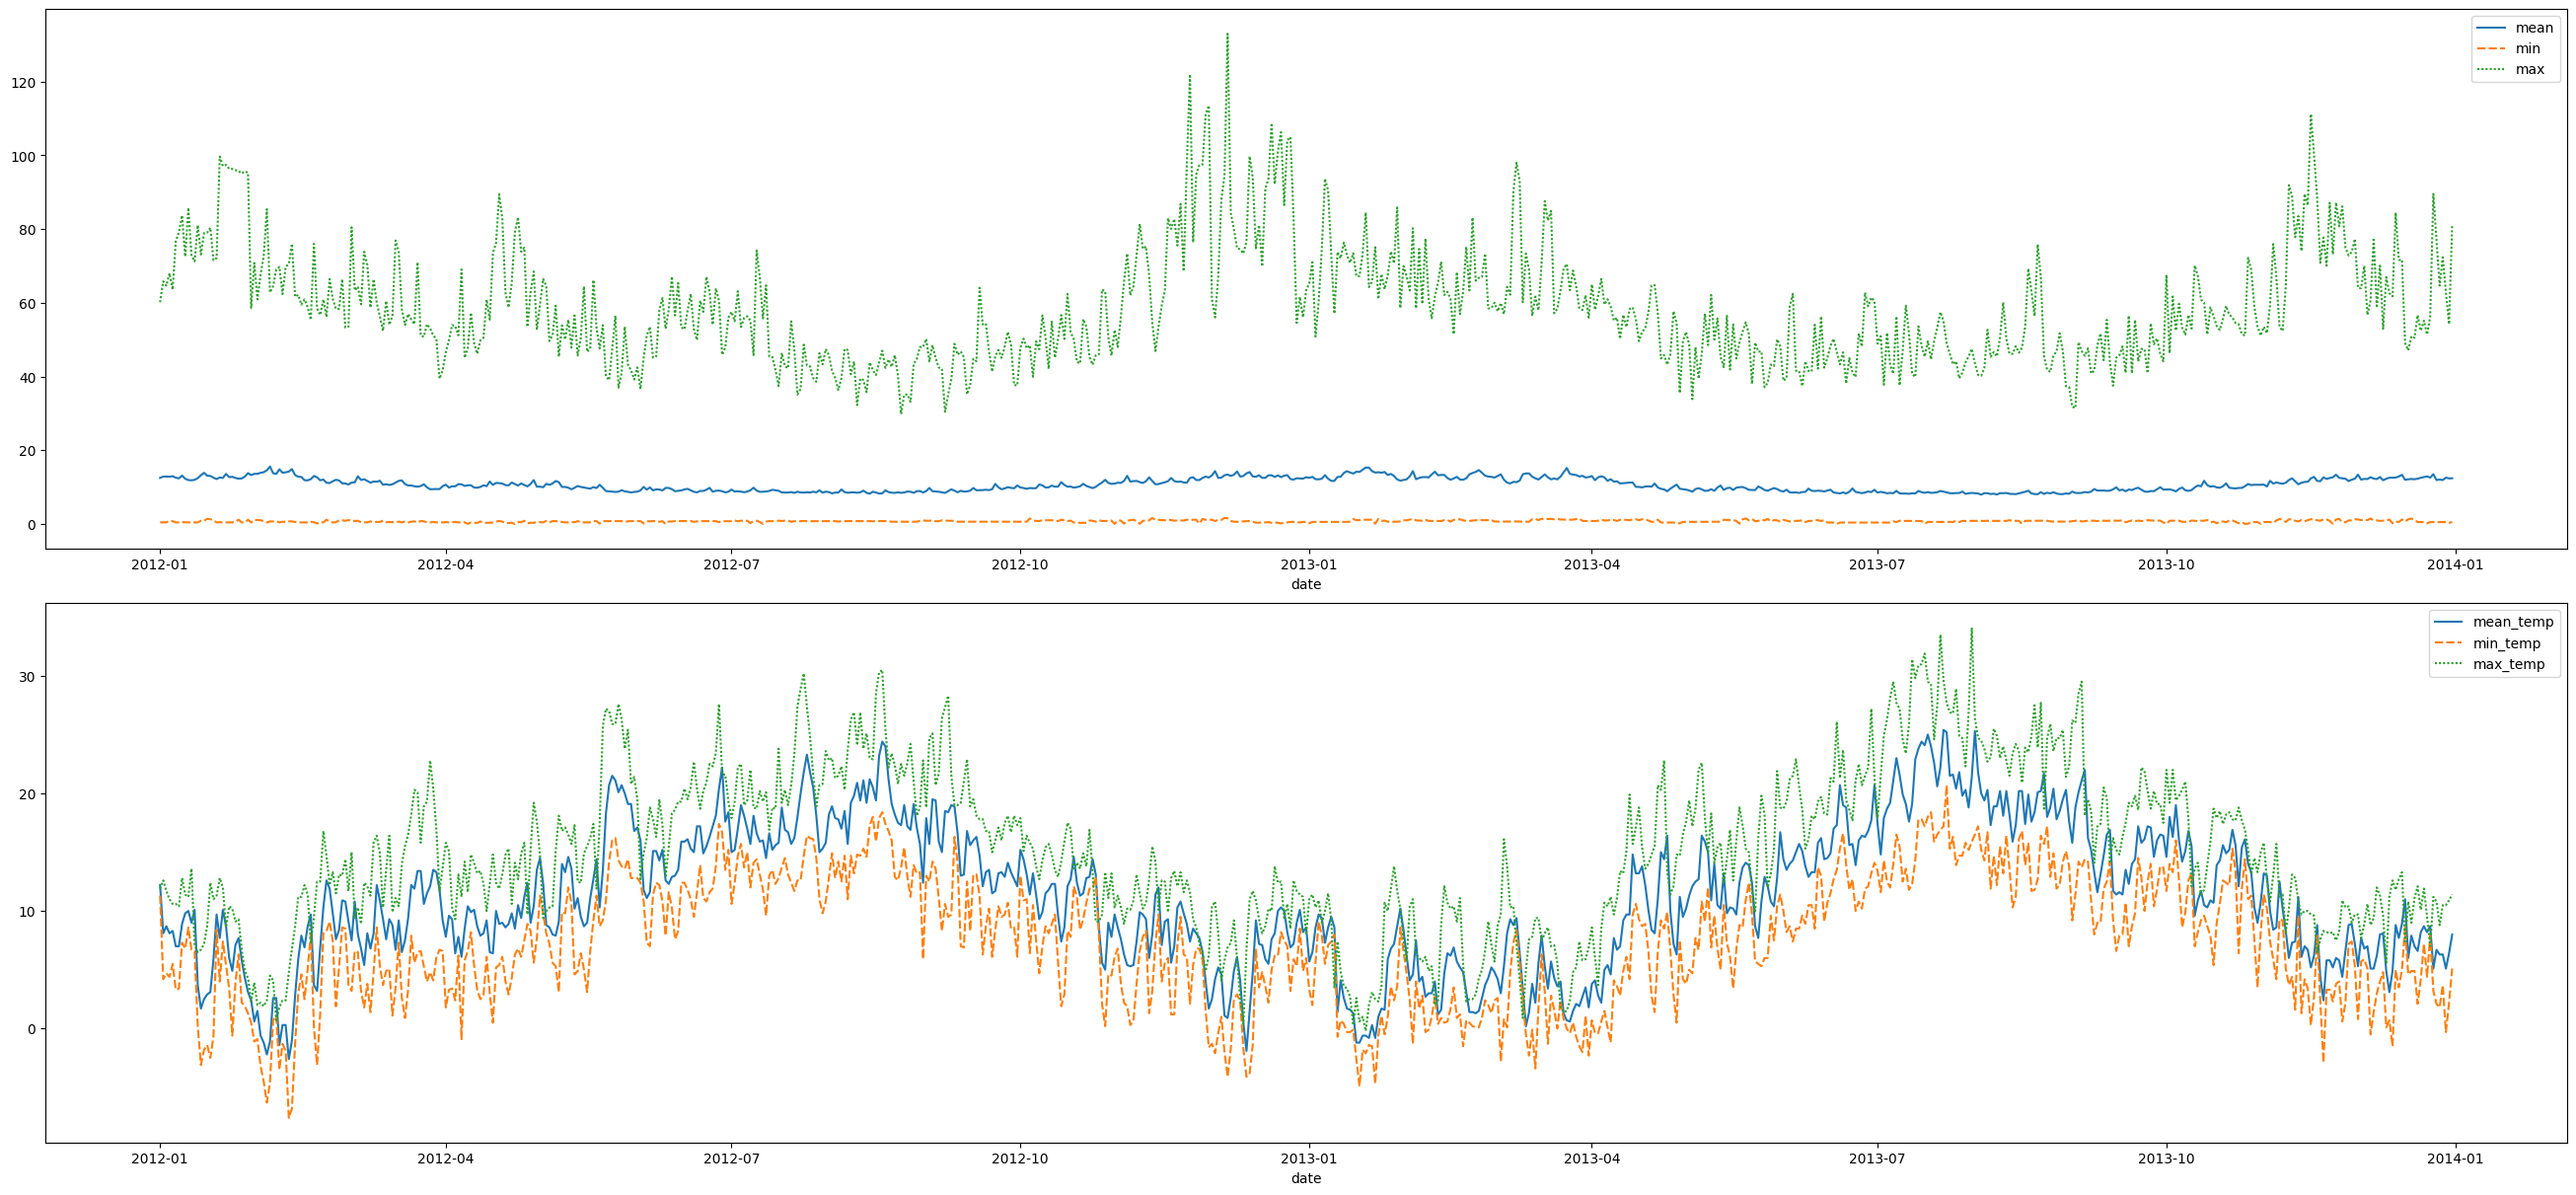

In [48]:
fig = plt.figure(figsize=(26,12), layout='constrained')
(ax1, ax2) = fig.subplots(2,1)

sns.lineplot( data =df_weather_energy_new[['mean','min', 'max']] , ax= ax1)
sns.lineplot( data =df_weather_energy_new[['mean_temp','min_temp', 'max_temp']] , ax= ax2)
plt.show()

In [49]:
df_weather_energy_new['weekday'] = df_weather_energy_new['date'].dt.weekday
df_weather_energy_new['month'] = df_weather_energy_new['date'].dt.month
df_weather_energy_new['day'] = df_weather_energy_new['date'].dt.date

In [50]:
df_weather_energy_new

,date,min,max,mean,cloud_cover,max_temp,mean_temp,min_temp,snow,rain,maxtemp,mintemp,meantemp,weekday,month,day
date,,,,,,,,,,,,,,,,
2012-01-01,2012-01-01,0.445,60.159,12.536493,7.0,11.9,12.2,11.3,False,True,2,3,4,6,1,2012-01-01
2012-01-02,2012-01-02,0.463,65.824,12.864265,1.0,12.6,8.1,4.2,False,True,2,2,3,0,1,2012-01-02
2012-01-03,2012-01-03,0.464,64.652,12.893674,5.0,11.7,8.7,4.7,False,True,2,2,3,1,1,2012-01-03
2012-01-04,2012-01-04,0.838,68.020,12.829674,4.0,11.0,8.1,4.4,False,True,2,2,3,2,1,2012-01-04
2012-01-05,2012-01-05,0.764,63.598,12.980193,4.0,10.6,8.3,5.5,False,True,1,2,3,3,1,2012-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,2013-12-27,0.536,64.658,12.067254,4.0,8.8,6.3,1.8,False,False,1,1,2,4,12,2013-12-27
2013-12-28,2013-12-28,0.550,72.353,11.930291,2.0,10.5,6.3,3.7,False,False,1,1,2,5,12,2013-12-28
2013-12-29,2013-12-29,0.538,62.881,12.591813,1.0,10.5,5.1,-0.3,False,True,1,1,2,6,12,2013-12-29


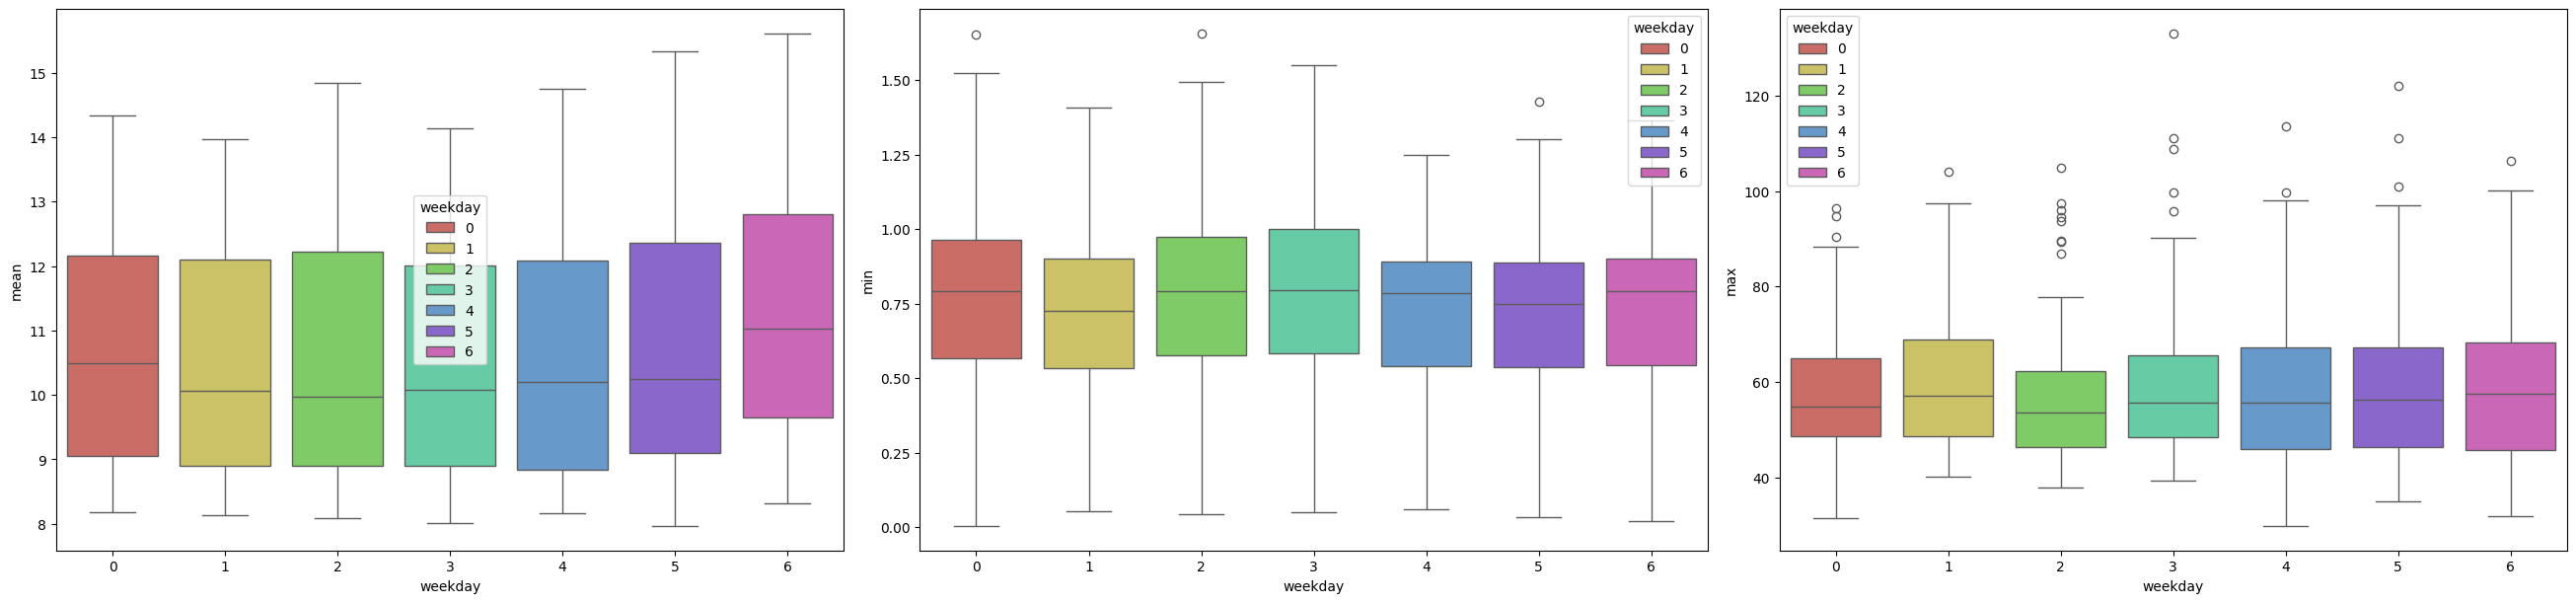

In [54]:
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1, ax2, ax3) = fig.subplots(1,3)

sns.boxplot(x='weekday', y='mean', data = df_weather_energy_new, order=[0,1,2,3,4,5,6],hue= 'weekday', ax=ax1, palette=sns.color_palette('hls', 7))
sns.boxplot(x='weekday', y='min', data = df_weather_energy_new, order=[0,1,2,3,4,5,6],hue= 'weekday', ax=ax2, palette=sns.color_palette('hls', 7))
sns.boxplot(x='weekday', y='max', data = df_weather_energy_new, order=[0,1,2,3,4,5,6],hue= 'weekday', ax=ax3, palette=sns.color_palette('hls', 7))

plt.show()

/var/folders/wp/qtpm72194czff6rn4dry0c7c0000gn/T/ipykernel_1817/3492339618.py:4: UserWarning: 
The palette list has fewer values (7) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='month', y='mean', data = df_weather_energy_new, order=[0,1,2,3,4,5,6,7,8,9,10,11],hue= 'month', ax=ax1, palette=sns.color_palette('hls', 7))
/var/folders/wp/qtpm72194czff6rn4dry0c7c0000gn/T/ipykernel_1817/3492339618.py:5: UserWarning: 
The palette list has fewer values (7) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='month', y='min', data = df_weather_energy_new, order=[0,1,2,3,4,5,6,7,8,9,10,11],hue= 'month', ax=ax2, palette=sns.color_palette('hls', 7))
/var/folders/wp/qtpm72194czff6rn4dry0c7c0000gn/T/ipykernel_1817/3492339618.py:6: UserWarning: 
The palette list has fewer values (7) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='month', y='max', data = df_weather_energy

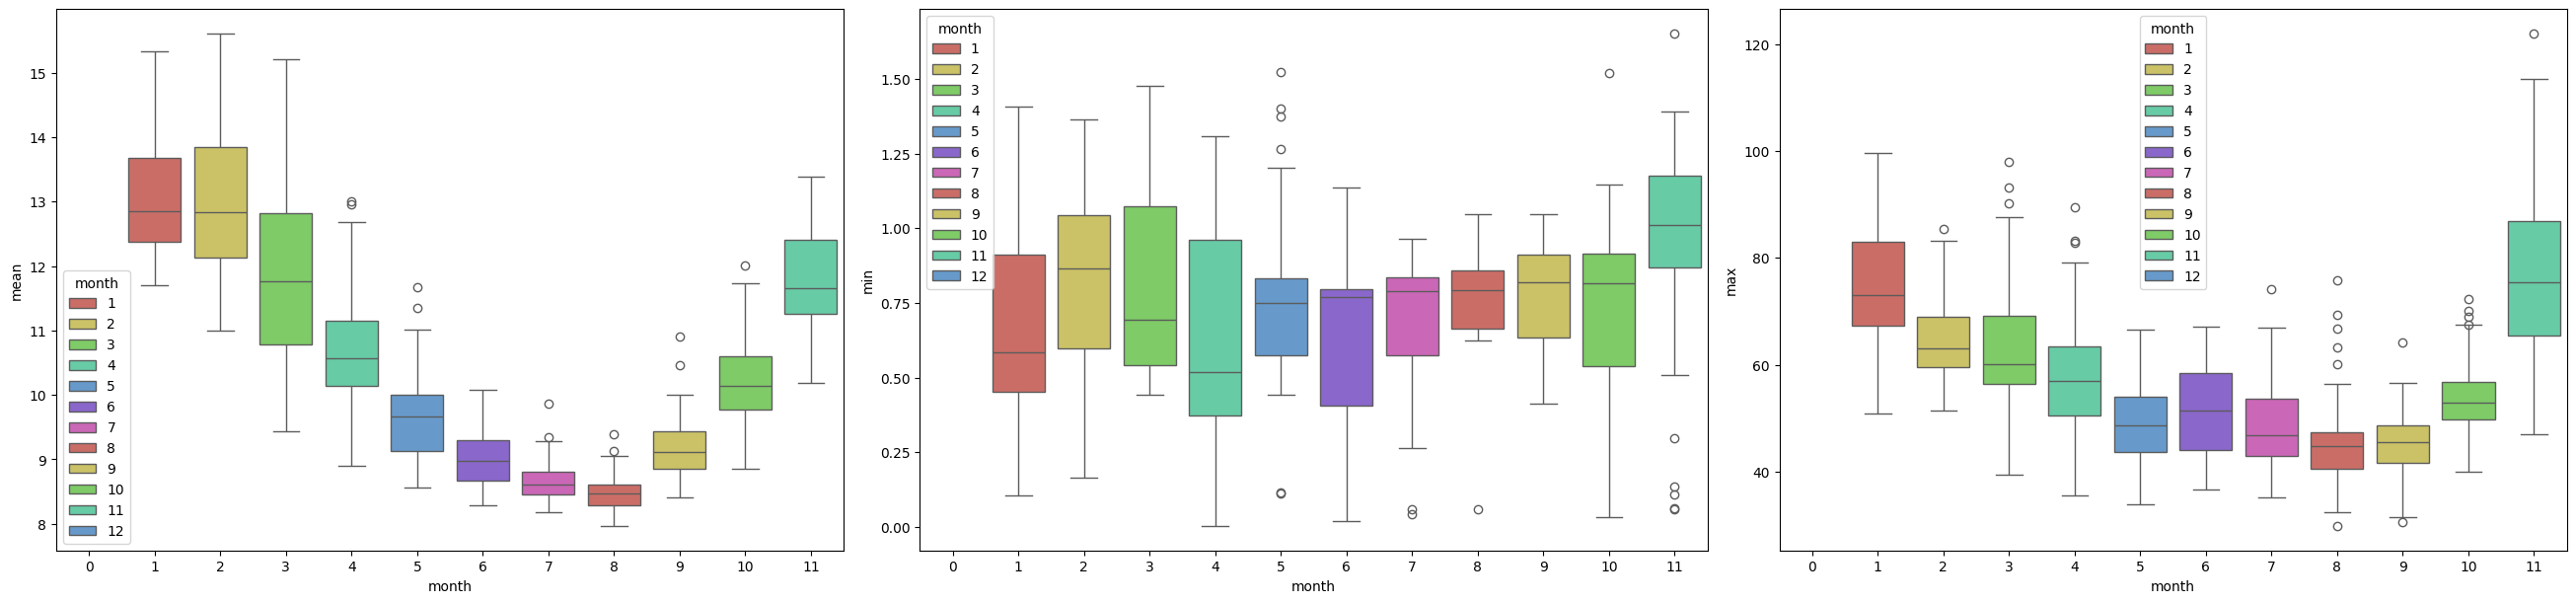

In [55]:
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1, ax2, ax3) = fig.subplots(1,3)

sns.boxplot(x='month', y='mean', data = df_weather_energy_new, order=[0,1,2,3,4,5,6,7,8,9,10,11],hue= 'month', ax=ax1, palette=sns.color_palette('hls', 7))
sns.boxplot(x='month', y='min', data = df_weather_energy_new, order=[0,1,2,3,4,5,6,7,8,9,10,11],hue= 'month', ax=ax2, palette=sns.color_palette('hls', 7))
sns.boxplot(x='month', y='max', data = df_weather_energy_new, order=[0,1,2,3,4,5,6,7,8,9,10,11],hue= 'month', ax=ax3, palette=sns.color_palette('hls', 7))

plt.show()